
##Exercise 12: Keras - Deep & Convolutional Neural Network image recognition </span>
The goal of the following exercise is to use DNN in order to recognize images which reduces simply to a case of supervised learning. In this specific case the images will be representing the 10 digits abd the training data is imported from the MNIST dataset, a dataset containing 70000 28x28 pixels images each associated to the correct label (the correct digit). Each pixel is associated to a scale from white to black represented as a number ranging from 0 to 255.

In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)
%config InlineBackend.figure_format='retina'

In [5]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


### Data reshaping

The imported data is reshaped according to Keras needs. An example of data point is then shown.

X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


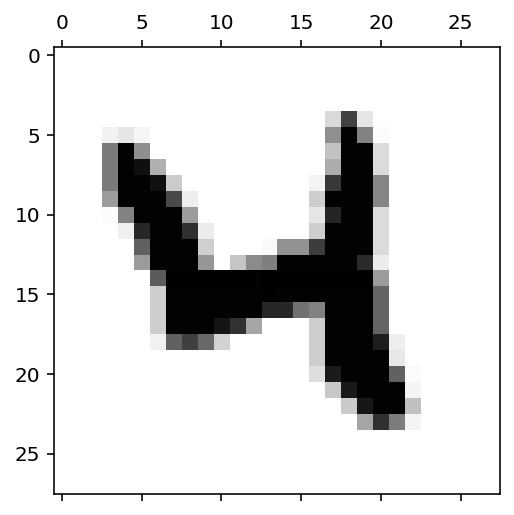

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Y_test shape: (10000, 10)


In [6]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

### Exercise 12.01: Building of the DNN

In the first part of the exercise a DNN to be trained for image recognition is built. A few possibilities are explored varying the chosen optimizer. The model is then trained with 60000 data and tested on 10000 and with a batch size of 32 and 10 total epochs.

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [8]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


The first try for the optimization is the SGD

In [9]:
# training parameters
batch_size = 32
epochs = 10

# create the deep neural net
model_DNN = compile_model(SGD())

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7280 - acc: 0.7885 - val_loss: 0.3028 - val_acc: 0.9176
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3727 - acc: 0.8941 - val_loss: 0.2340 - val_acc: 0.9324
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3016 - acc: 0.9159 - val_loss: 0.1969 - val_acc: 0.9421
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2598 - acc: 0.9276 - val_loss: 0.1723 - val_acc: 0.9477
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2301 - acc: 0.9351 - val_loss: 0.1572 - val_acc: 0.9501
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2070 - acc: 0.9418 - val_loss: 0.1430 - val_acc: 0.9542
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1882 - acc: 0.9470 - val_loss: 0.1304 - val_acc: 0.9581
Epoch 8/10
1875/1875 [==============================] -

313/313 [==============================] - 1s 4ms/step - loss: 0.1089 - acc: 0.9652

Test loss: 0.10890483111143112
Test accuracy: 0.9652000069618225


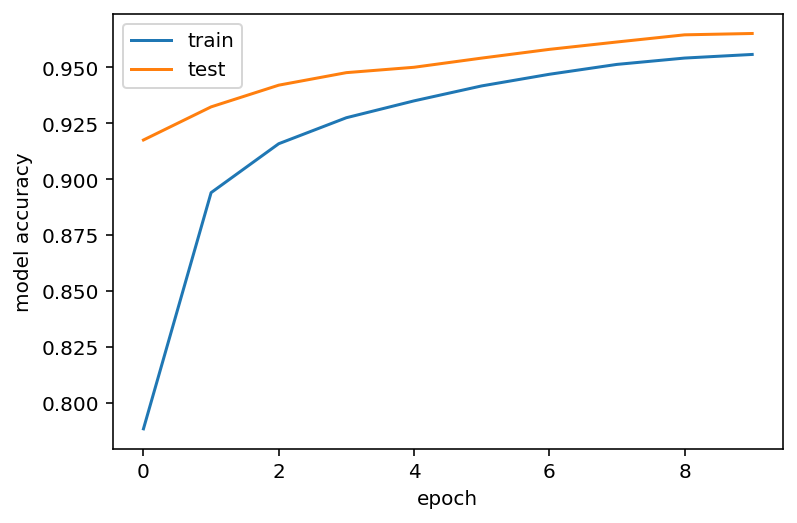

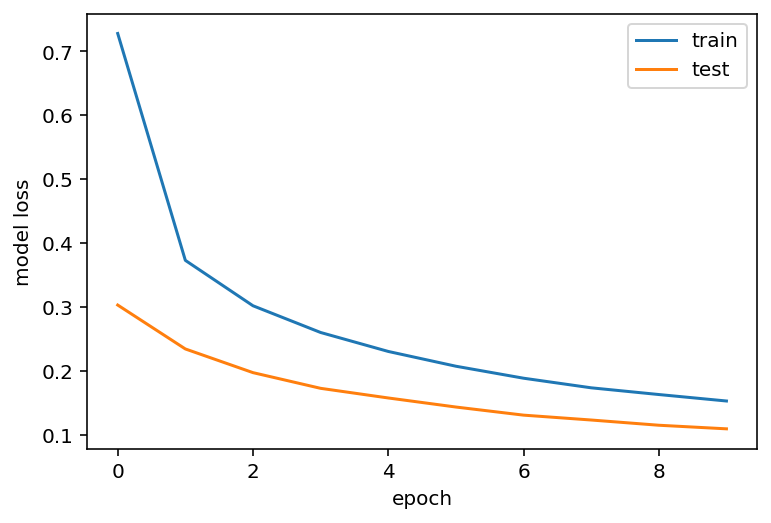

In [10]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Next the Adam optimizer is chosen


In [11]:
# create the deep neural net
model_DNN = compile_model(Adam())

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2832 - acc: 0.9173 - val_loss: 0.1018 - val_acc: 0.9701
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1221 - acc: 0.9654 - val_loss: 0.0859 - val_acc: 0.9730
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0864 - acc: 0.9746 - val_loss: 0.0747 - val_acc: 0.9772
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0672 - acc: 0.9797 - val_loss: 0.0788 - val_acc: 0.9772
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0593 - acc: 0.9821 - val_loss: 0.0719 - val_acc: 0.9802
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0457 - acc: 0.9864 - val_loss: 0.0775 - val_acc: 0.9797
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0413 - acc: 0.9876 - val_loss: 0.0864 - val_acc: 0.9796
Epoch 8/10
1875/1875 [==============================] -

313/313 [==============================] - 1s 3ms/step - loss: 0.0814 - acc: 0.9817

Test loss: 0.08140712976455688
Test accuracy: 0.9817000031471252


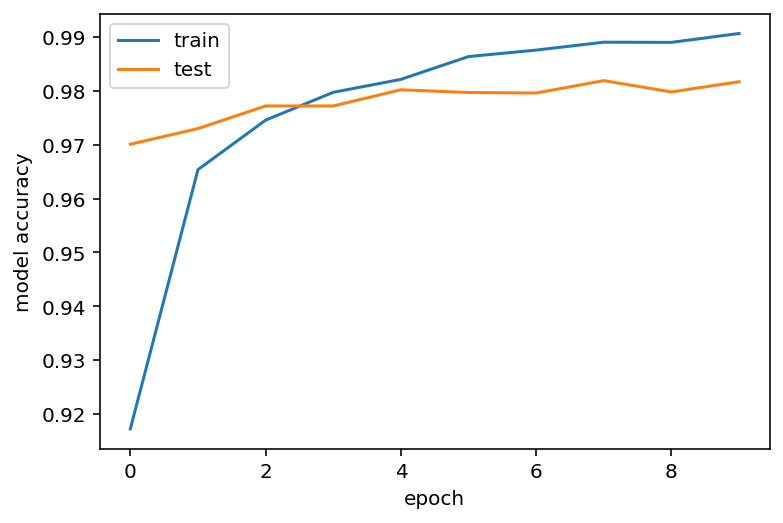

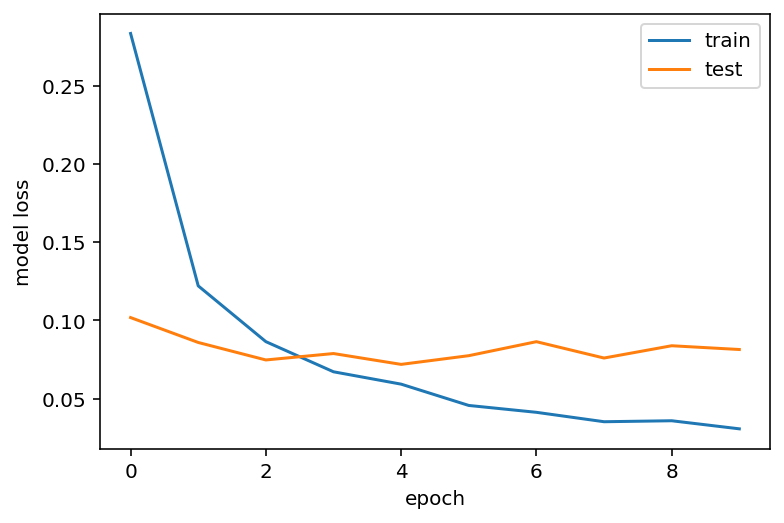

In [12]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Finally the Adagrad optimizer is chosen.

In [13]:
# create the deep neural net
model_DNN = compile_model(Adagrad())

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
print('Y_train shape:', Y_train.shape)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.2764 - acc: 0.6297 - val_loss: 0.6232 - val_acc: 0.8646
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6975 - acc: 0.8004 - val_loss: 0.4423 - val_acc: 0.8927
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5705 - acc: 0.8353 - val_loss: 0.3765 - val_acc: 0.9013
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5097 - acc: 0.8532 - val_loss: 0.3400 - val_acc: 0.9102
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4676 - acc: 0.8669 - val_loss: 0.3162 - val_acc: 0.9140
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4428 - acc: 0.8733 - val_loss: 0.2986 - val_acc: 0.9184
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4163 - acc: 0.8826 - val_loss: 0.2837 - val_acc: 0.9217
Epoch 8/10
1875/1875 [==============================] -

313/313 [==============================] - 1s 3ms/step - loss: 0.2542 - acc: 0.9274

Test loss: 0.2542211413383484
Test accuracy: 0.9273999929428101


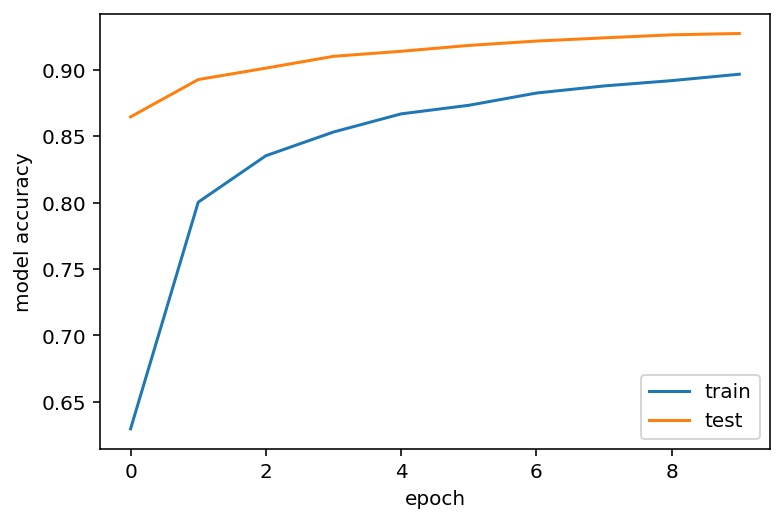

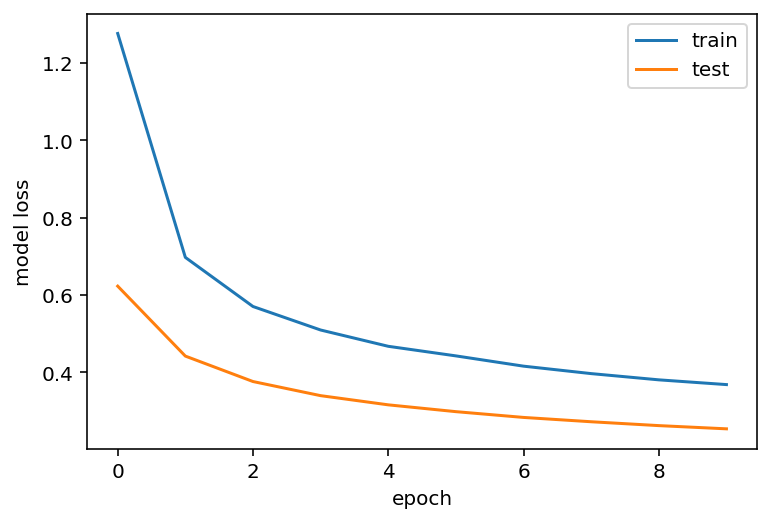

In [14]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

The best performing optimizer looking at the performances is the Adam. Finally it can be shown how the DNN performs on 10 random digits from the test data taking 1 image per digit.  

In [15]:
# create the deep neural net
model_DNN = compile_model(Adam())

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
print('Y_train shape:', Y_train.shape)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2758 - acc: 0.9190 - val_loss: 0.1160 - val_acc: 0.9630
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1200 - acc: 0.9660 - val_loss: 0.0896 - val_acc: 0.9732
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0876 - acc: 0.9746 - val_loss: 0.0831 - val_acc: 0.9732
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0661 - acc: 0.9807 - val_loss: 0.0842 - val_acc: 0.9760
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0579 - acc: 0.9820 - val_loss: 0.0701 - val_acc: 0.9800
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0484 - acc: 0.9856 - val_loss: 0.0829 - val_acc: 0.9783
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0429 - acc: 0.9869 - val_loss: 0.0767 - val_acc: 0.9805
Epoch 8/10
1875/1875 [==============================] 

313/313 [==============================] - 1s 3ms/step


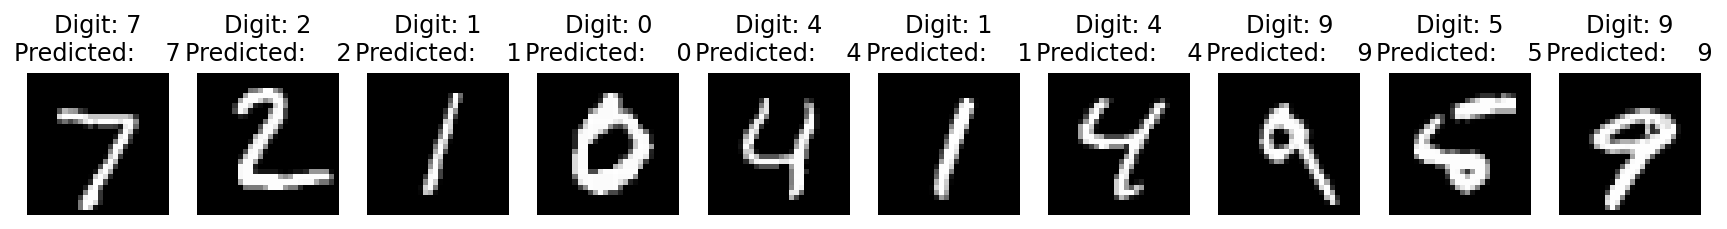

Y_train shape: (60000, 10)


In [16]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
print('Y_train shape:', Y_train.shape)

### Exercise 12.2/12.3

In the second part of the exercise the DNN is changed into a CNN,  a Convolutional Neural Network. After this is trained it is then tested in the last part on digits taken outside of the imported MNIST dataset.

In [17]:
from keras.datasets import mnist

# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [18]:
def create_CNN():
    model = Sequential()
    
    model.add(Conv2D(10,kernel_size=(5,5),
                    activation = 'relu',
                    input_shape = input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(3,kernel_size=(5,5),
                    activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Flatten())

    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [19]:
# training parameters
batch_size = 32
epochs = 10

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 38s 19ms/step - loss: 1.4481 - acc: 0.4961 - val_loss: 0.6024 - val_acc: 0.8306
Epoch 2/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.7448 - acc: 0.7668 - val_loss: 0.4384 - val_acc: 0.8655
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5968 - acc: 0.8163 - val_loss: 0.3325 - val_acc: 0.8986
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.5178 - acc: 0.8426 - val_loss: 0.2936 - val_acc: 0.9111
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4505 - acc: 0.8644 - val_loss: 0.2422 - val_acc: 0.9238
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4071 - acc: 0.8777 - val_loss: 0.2187 - val_acc: 0.9335
Epoch 7/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.3759 - acc: 0.8878 - val_loss: 0.2152 - val_acc: 0.9334
Epoch 8/10
1875/1875 [==========================


Test loss: 0.17348802089691162
Test accuracy: 0.9447000026702881


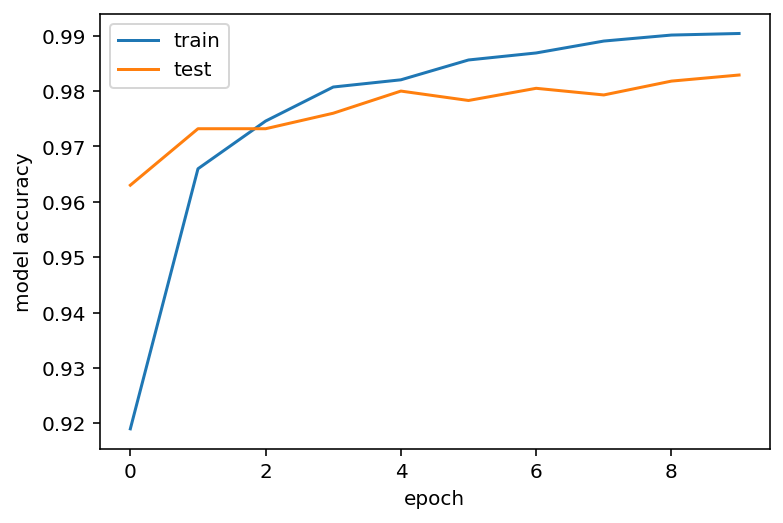

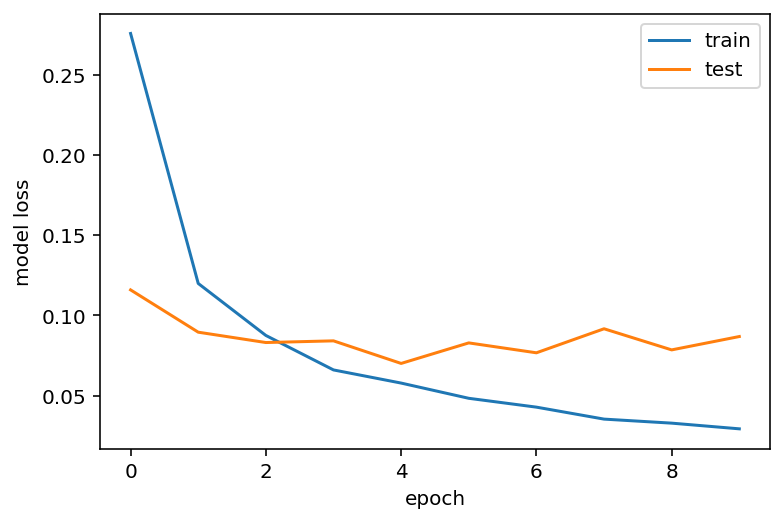

In [20]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 2s 7ms/step


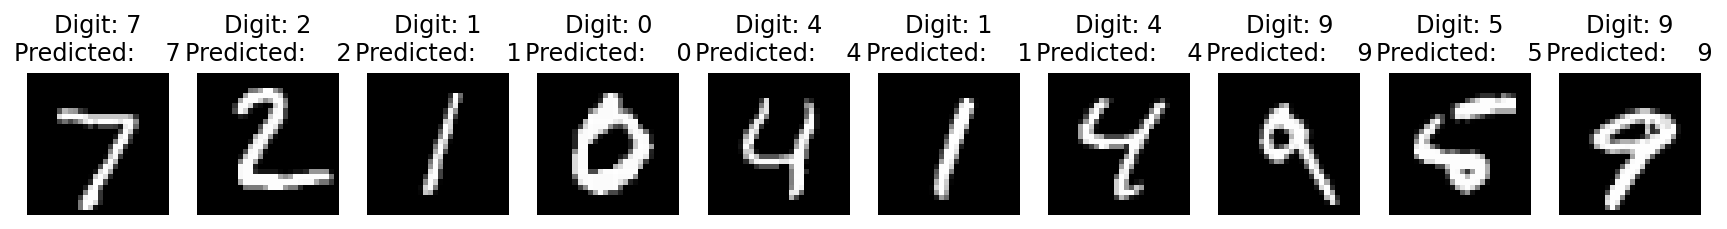

In [21]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Now the trained CNN is tested on other data with different handwriting.

In [22]:
# TO LOAD FILES ON GOOGLE COLAB
from google.colab import files
upload = files.upload() #this will let you browse and choose the file to be uploaded

Saving 0.png to 0.png
Saving 1.png to 1.png
Saving 2.png to 2.png
Saving 3.png to 3.png
Saving 4.png to 4.png
Saving 5.png to 5.png
Saving 6.png to 6.png
Saving 7.png to 7.png
Saving 8.png to 8.png
Saving 9.png to 9.png


In [25]:
from PIL import Image
import os

digit_test = np.zeros((10,28, 28))
digit_target = np.zeros((10,10))


for k in range(10):
  digit_filename = str(k) + ".png"
  digit_in = Image.open(str(k) + ".png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE
  ydim, xdim = digit_in.size
  pix=digit_in.load();
  data = np.zeros((xdim, ydim))
  for j in range(ydim):
      for i in range(xdim):
          data[i,j]=pix[j,i]

  data /= 255
  digit_test[k] = data

if tf.keras.backend.image_data_format() == 'channels_first':
    digit_test = digit_test.reshape(digit_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    digit_test = digit_test.reshape(digit_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

1/1 [==============================] - 0s 86ms/step


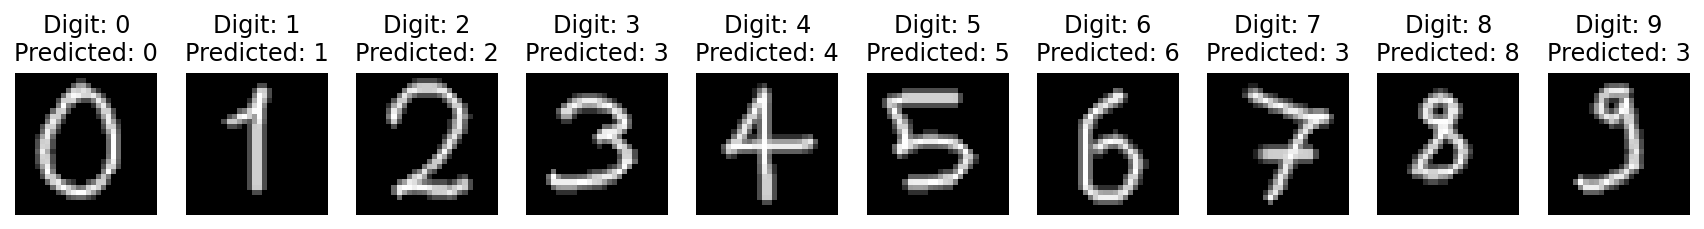

In [27]:
predictions = model_CNN.predict(digit_test)

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)       
    plt.imshow(digit_test[i, :, :, 0], cmap='gray')   
    plt.title("Digit: {}\nPredicted: {}".format(i, np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

The final result is of 8 digits recognized out of 10.